In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
os.chdir(r"D:\DS\Praxis\Study Material\Dataset\IPL")

In [3]:
matches = pd.read_csv("IPL Matches 2008-2020.csv")
deliveries = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [4]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [6]:
#number of matches played in each city
matches['city'].value_counts()

Mumbai            101
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Dubai              33
Abu Dhabi          29
Sharjah            18
Durban             15
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cape Town           7
Cuttack             7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

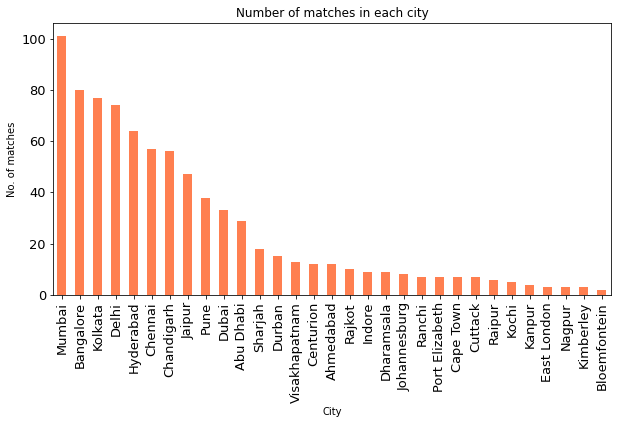

In [7]:
#graph for number of matches played in each city
matches['city'].value_counts().plot(kind='bar',figsize=(10,5),color='coral',fontsize=13,
                                    title='Number of matches in each city',
                                   xlabel = 'City',
                                   )
plt.ylabel('No. of matches')
plt.xlabel('City')
plt.show()

In [8]:
#number of matches played in different stadium
matches['venue'].value_counts()

M Chinnaswamy Stadium                                  80
Eden Gardens                                           77
Feroz Shah Kotla                                       74
Wankhede Stadium                                       73
Rajiv Gandhi International Stadium, Uppal              64
MA Chidambaram Stadium, Chepauk                        57
Punjab Cricket Association Stadium, Mohali             56
Sawai Mansingh Stadium                                 47
Dubai International Cricket Stadium                    33
Sheikh Zayed Stadium                                   29
Maharashtra Cricket Association Stadium                21
Sharjah Cricket Stadium                                18
Dr DY Patil Sports Academy                             17
Subrata Roy Sahara Stadium                             17
Kingsmead                                              15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    13
Sardar Patel Stadium, Motera                           12
SuperSport Par

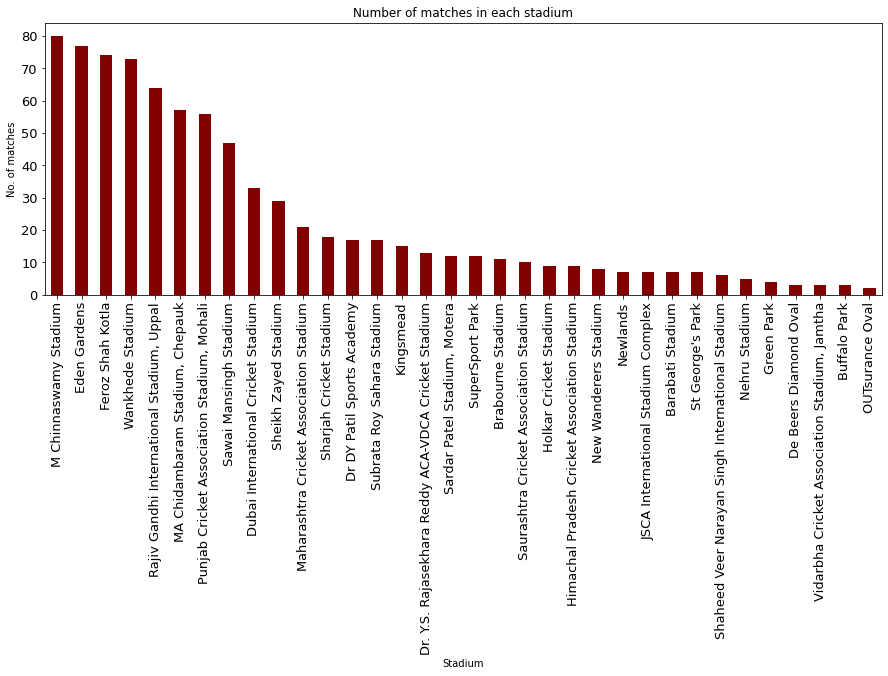

In [9]:
#graph for number of matches played in each stadium
matches['venue'].value_counts().plot(kind='bar',figsize=(15,5),color='maroon',fontsize=13,
                                    title='Number of matches in each stadium',
                                   xlabel = 'Stadium',
                                   )
plt.ylabel('No. of matches')
plt.xlabel('Stadium')
plt.show()

In [47]:
#how much of a advantage is winning the toss
win_toss_win = 0
win_toss_loss = 0
for i in range(len(matches)):
    if matches['toss_winner'][i] == matches['winner'][i]:
        win_toss_win+=1
    else:
        win_toss_loss+=1
print(win_toss_win,win_toss_loss-4) #4 matches had no results
        

418 394


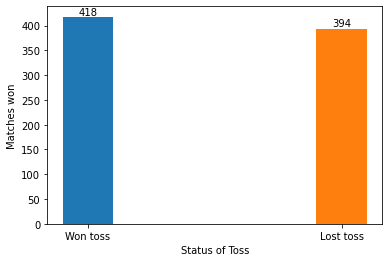

In [49]:
plt.bar(x='Won toss',height=win_toss_win,align='center',width=0.2)
plt.text('Won toss',win_toss_win,win_toss_win,ha='center',va='bottom')
plt.bar(x='Lost toss',height=win_toss_loss-4,align='center',width=0.2)
plt.text('Lost toss',win_toss_loss-4,win_toss_loss-4,ha='center',va='bottom')
plt.ylabel('Matches won')
plt.xlabel('Status of Toss')
plt.show()

In [12]:
#Number of matches won by each team
#False - Toss lost
#True - Toss Won
k = pd.crosstab(matches.toss_winner==matches.winner,columns=matches.winner,
            rownames=['Toss_Won'],colnames=['Matches_Won'],
            margins=True,margins_name='Total').transpose()
k

Toss_Won,False,True,Total
Matches_Won,,,
Chennai Super Kings,45,61,106
Deccan Chargers,10,19,29
Delhi Capitals,9,10,19
Delhi Daredevils,32,35,67
Gujarat Lions,3,10,13
Kings XI Punjab,52,36,88
Kochi Tuskers Kerala,2,4,6
Kolkata Knight Riders,44,55,99
Mumbai Indians,59,61,120


In [43]:
#conditional probability of winning or loosing toss(in Matches won)
k = pd.crosstab(matches.toss_winner==matches.winner,columns=matches.winner,
            rownames=['Toss_Won'],colnames=['Matches_Won'])

In [44]:
k

Matches_Won,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
Toss_Won,,,,,,,,,,,,,,
False,45,10,9,32,3,52,2,44,59,9,37,7,48,37
True,61,19,10,35,10,36,4,55,61,3,44,8,43,29


In [46]:
#given that a team has won a match, what is the probability that they have won or lost a toss
k.div(k.sum(axis=0),axis=1)

Matches_Won,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
Toss_Won,,,,,,,,,,,,,,
False,0.424528,0.344828,0.473684,0.477612,0.230769,0.590909,0.333333,0.444444,0.491667,0.75,0.45679,0.466667,0.527473,0.560606
True,0.575472,0.655172,0.526316,0.522388,0.769231,0.409091,0.666667,0.555556,0.508333,0.25,0.54321,0.533333,0.472527,0.439394


In [52]:
#conditional probability of winning or loosing match(while Winning Toss)
z = pd.crosstab(matches.toss_winner==matches.winner,columns=matches.toss_winner,
            rownames=['Matches_Won'],colnames=['Toss_Won'])
z

Toss_Won,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
Matches_Won,,,,,,,,,,,,,,
False,36,24,10,45,5,49,4,43,45,17,43,5,44,28
True,61,19,10,35,10,36,4,55,61,3,44,8,43,29


In [53]:
#given that a team has won the toss, what is the probability that they will win the match
z.div(z.sum(axis=0),axis=1)

Toss_Won,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
Matches_Won,,,,,,,,,,,,,,
False,0.371134,0.55814,0.5,0.5625,0.333333,0.576471,0.5,0.438776,0.424528,0.85,0.494253,0.384615,0.505747,0.491228
True,0.628866,0.44186,0.5,0.4375,0.666667,0.423529,0.5,0.561224,0.575472,0.15,0.505747,0.615385,0.494253,0.508772


In [13]:
#total number of matches played by each team
a = matches.team1.value_counts()+matches.team2.value_counts()

In [14]:
a

Chennai Super Kings            178
Deccan Chargers                 75
Delhi Capitals                  33
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          192
Mumbai Indians                 203
Pune Warriors                   46
Rajasthan Royals               161
Rising Pune Supergiants         30
Royal Challengers Bangalore    195
Sunrisers Hyderabad            124
dtype: int64

In [15]:
#total number of matches won by each team
b = matches.winner.value_counts()
b = b.sort_index()

In [16]:
b

Chennai Super Kings            106
Deccan Chargers                 29
Delhi Capitals                  19
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 88
Kochi Tuskers Kerala             6
Kolkata Knight Riders           99
Mumbai Indians                 120
Pune Warriors                   12
Rajasthan Royals                81
Rising Pune Supergiants         15
Royal Challengers Bangalore     91
Sunrisers Hyderabad             66
Name: winner, dtype: int64

In [17]:
#total number of toss won by each team
c = matches.toss_winner.value_counts().sort_index()

In [18]:
c

Chennai Super Kings             97
Deccan Chargers                 43
Delhi Capitals                  20
Delhi Daredevils                80
Gujarat Lions                   15
Kings XI Punjab                 85
Kochi Tuskers Kerala             8
Kolkata Knight Riders           98
Mumbai Indians                 106
Pune Warriors                   20
Rajasthan Royals                87
Rising Pune Supergiants         13
Royal Challengers Bangalore     87
Sunrisers Hyderabad             57
Name: toss_winner, dtype: int64

In [19]:
#dataframe with team details
team_details = pd.DataFrame({'Teams':a.index,'No. of matches played(A)':a.values,
                            'No. of matches won(B)':b.values,
                            'No. of toss won(C)':c.values})

In [20]:
#toss won percentage
team_details['Toss won % D=(C/A)'] = np.round((team_details['No. of toss won(C)']/team_details['No. of matches played(A)'])*100,2)

In [21]:
#number of toss won & matches won
team_details['Toss & Matches won, E'] = k.iloc[0:14,1].values

In [22]:
#toss won and matches won %
team_details['(Matches won when Toss won) in %, F=(E/C)'] = np.round(
    team_details['Toss & Matches won, E']/team_details['No. of toss won(C)']*100,2)

In [23]:
#number of toss lost & matches won
team_details['Number of toss lost & matches won, G=(B-E)'] = team_details.iloc[0:,2]-team_details.iloc[0:,5]

In [24]:
#toss lost and matches won %
team_details['(Matches won when Toss lost) in %, H=(G/(A-C))'] = np.round(
    (team_details.iloc[0:,7])/(team_details.iloc[0:,1]-team_details.iloc[0:,3])*100,2)

In [25]:
team_details

,Teams,No. of matches played(A),No. of matches won(B),No. of toss won(C),Toss won % D=(C/A),"Toss & Matches won, E","(Matches won when Toss won) in %, F=(E/C)","Number of toss lost & matches won, G=(B-E)","(Matches won when Toss lost) in %, H=(G/(A-C))"
0,Chennai Super Kings,178,106,97,54.49,61,62.89,45,55.56
1,Deccan Chargers,75,29,43,57.33,19,44.19,10,31.25
2,Delhi Capitals,33,19,20,60.61,10,50.00,9,69.23
3,Delhi Daredevils,161,67,80,49.69,35,43.75,32,39.51
4,Gujarat Lions,30,13,15,50.00,10,66.67,3,20.00
5,Kings XI Punjab,190,88,85,44.74,36,42.35,52,49.52
6,Kochi Tuskers Kerala,14,6,8,57.14,4,50.00,2,33.33
7,Kolkata Knight Riders,192,99,98,51.04,55,56.12,44,46.81
8,Mumbai Indians,203,120,106,52.22,61,57.55,59,60.82
9,Pune Warriors,46,12,20,43.48,3,15.00,9,34.62


In [26]:
#changing column size of dataframe
#team_details.style.set_table_styles([dict(selector="th",props=[('max-width', '100px')])])

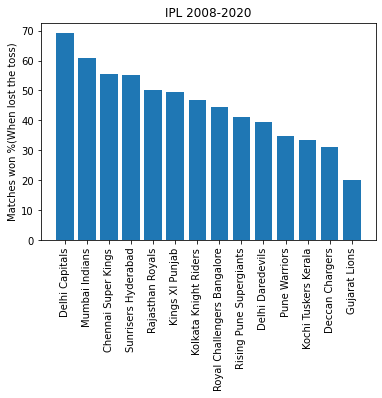

In [28]:
df = team_details.sort_values('(Matches won when Toss lost) in %, H=(G/(A-C))',ascending=False)
plt.bar(x=df.Teams,height=df.iloc[:,8],align='center')
plt.xticks(rotation=90)
plt.title("IPL 2008-2020")
plt.ylabel('Matches won %(When lost the toss)')
plt.show()

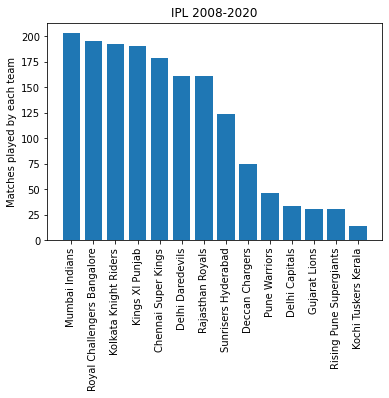

In [29]:
#number of matches played by each team
df = team_details.sort_values('No. of matches played(A)',ascending=False)
plt.bar(x=df.Teams,height=df.iloc[:,1],align='center')
plt.xticks(rotation=90)
plt.title("IPL 2008-2020")
plt.ylabel('Matches played by each team')
plt.show()

In [30]:
#matches won(%)
team_details.insert(loc=3,column='Matches won %, (I=B/A)',value=np.round((team_details.iloc[0:,2]/team_details.iloc[0:,1])*100,2))

In [31]:
team_details

,Teams,No. of matches played(A),No. of matches won(B),"Matches won %, (I=B/A)",No. of toss won(C),Toss won % D=(C/A),"Toss & Matches won, E","(Matches won when Toss won) in %, F=(E/C)","Number of toss lost & matches won, G=(B-E)","(Matches won when Toss lost) in %, H=(G/(A-C))"
0,Chennai Super Kings,178,106,59.55,97,54.49,61,62.89,45,55.56
1,Deccan Chargers,75,29,38.67,43,57.33,19,44.19,10,31.25
2,Delhi Capitals,33,19,57.58,20,60.61,10,50.00,9,69.23
3,Delhi Daredevils,161,67,41.61,80,49.69,35,43.75,32,39.51
4,Gujarat Lions,30,13,43.33,15,50.00,10,66.67,3,20.00
5,Kings XI Punjab,190,88,46.32,85,44.74,36,42.35,52,49.52
6,Kochi Tuskers Kerala,14,6,42.86,8,57.14,4,50.00,2,33.33
7,Kolkata Knight Riders,192,99,51.56,98,51.04,55,56.12,44,46.81
8,Mumbai Indians,203,120,59.11,106,52.22,61,57.55,59,60.82
9,Pune Warriors,46,12,26.09,20,43.48,3,15.00,9,34.62


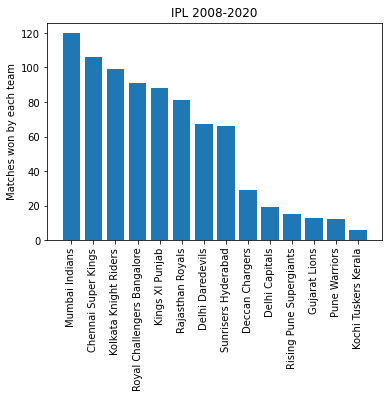

In [32]:
#number of matches won by each team
df = team_details.sort_values('No. of matches won(B)',ascending=False)
plt.bar(x=df.Teams,height=df.iloc[:,2],align='center')
plt.xticks(rotation=90)
plt.title("IPL 2008-2020")
plt.ylabel('Matches won by each team')
plt.show()

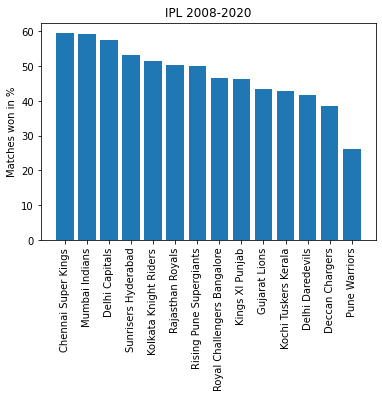

In [33]:
#win percentage
df = team_details.sort_values('Matches won %, (I=B/A)',ascending=False)
plt.bar(x=df.Teams,height=df.iloc[:,3],align='center')
plt.xticks(rotation=90)
plt.title("IPL 2008-2020")
plt.ylabel('Matches won in %')
plt.show()

In [34]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [35]:
#number of wins by home team
home_team_win = (matches.team1==matches.winner).sum()

In [36]:
#number of wins by away team
away_team_win = (matches.team1!=matches.winner).sum() - 4 #4 matches had no results

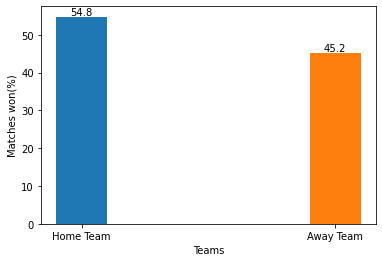

In [37]:
#Home vs Away advantage
plt.bar(x='Home Team',height=np.round((home_team_win/(home_team_win+away_team_win))*100,2),align='center',width=0.2)
plt.text('Home Team',np.round((home_team_win/(home_team_win+away_team_win))*100,2),np.round((home_team_win/(home_team_win+away_team_win))*100,2),ha='center',va='bottom')
plt.bar(x='Away Team',height=np.round((away_team_win/(home_team_win+away_team_win))*100,2),align='center',width=0.2)
plt.text('Away Team',np.round((away_team_win/(home_team_win+away_team_win))*100,2),np.round((away_team_win/(home_team_win+away_team_win))*100,2),ha='center',va='bottom')
plt.ylabel('Matches won(%)')
plt.xlabel('Teams')
plt.show()

In [54]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


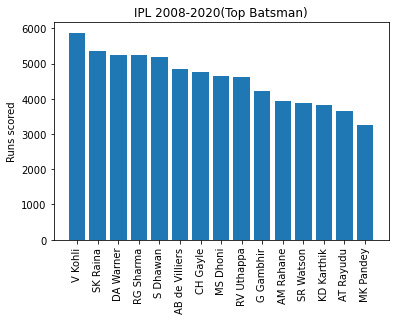

In [90]:
#Top 15 batsman by runs scored
df = deliveries[['batsman_runs','batsman']].groupby(['batsman']).sum().sort_values('batsman_runs',ascending=False)
df = df.head(15)
plt.bar(x=df.index,height=df.iloc[:,0],align='center')
plt.xticks(rotation=90)
plt.title("IPL 2008-2020(Top Batsman)")
plt.ylabel('Runs scored')
plt.show()

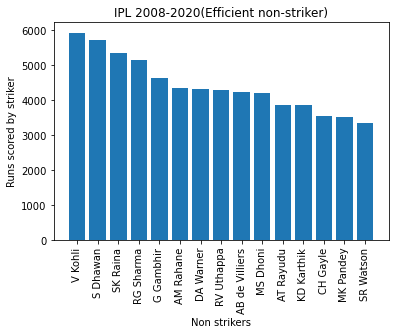

In [88]:
#Top 15 non-strikers with whom maximum runs have been scored
df = deliveries[['batsman_runs','non_striker']].groupby(['non_striker']).sum().sort_values('batsman_runs',ascending=False)
df = df.head(15)
plt.bar(x=df.index,height=df.iloc[:,0],align='center')
plt.xticks(rotation=90)
plt.title("IPL 2008-2020(Efficient non-striker)")
plt.ylabel('Runs scored by striker')
plt.xlabel('Non strikers')
plt.show()

In [119]:
#number of balls faced by players
a = deliveries.batsman.value_counts().sort_index()

In [150]:
a

A Ashish Reddy     196
A Chandila           7
A Chopra            75
A Choudhary         20
A Dananjaya          5
                  ... 
YV Takawale        183
Yashpal Singh       67
Younis Khan          7
Yuvraj Singh      2205
Z Khan             141
Name: batsman, Length: 537, dtype: int64

In [149]:
a.describe()

count     537.000000
mean      360.275605
std       719.017106
min         1.000000
25%        17.000000
50%        74.000000
75%       290.000000
max      4609.000000
Name: batsman, dtype: float64

In [173]:
#runs scored by players
df = deliveries[['batsman_runs','batsman']].groupby(['batsman']).sum().sort_values('batsman')
df['balls_faced'] = a.values

In [174]:
#strike rate of players
df['strike rate'] = np.round((df['batsman_runs']/df['balls_faced'])*100,2)

In [175]:
#minimum 500 balls faced
df = df[df['balls_faced']>500]

In [176]:
#top 15 strike rate
df = df.sort_values('strike rate',ascending=False)
df = df.head(15)

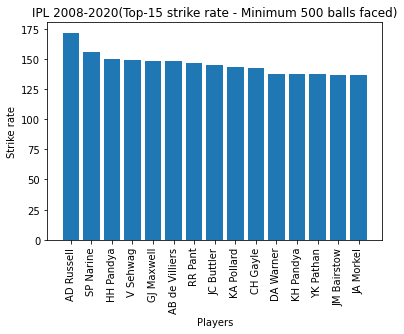

In [177]:
#Top 15 strike-rate in IPL (minimum 500 balls faced)
plt.bar(x=df.index,height=df.iloc[:,2],align='center')
plt.xticks(rotation=90)
plt.title("IPL 2008-2020(Top-15 strike rate - Minimum 500 balls faced)")
plt.ylabel('Strike rate')
plt.xlabel('Players')
plt.show()

In [191]:
#average runs scored in each delivery of the over
df = deliveries[['total_runs','ball']].groupby(['ball']).mean()
df = df[df.index<7]

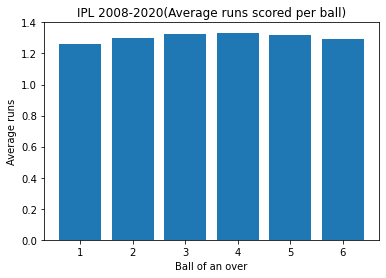

In [199]:
plt.bar(df.index,df.iloc[:,0],align='center')
plt.title("IPL 2008-2020(Average runs scored per ball)")
plt.ylabel('Average runs')
plt.xlabel('Ball of an over')
plt.show()

In [266]:
#average number of runs scored in each over of the innings
df = np.round(deliveries[['total_runs','over']].groupby(['over']).mean()*6,0)
df['over'] = np.arange(1,21,1)

In [268]:
df = df.rename(columns={'total_runs':"average_runs"})

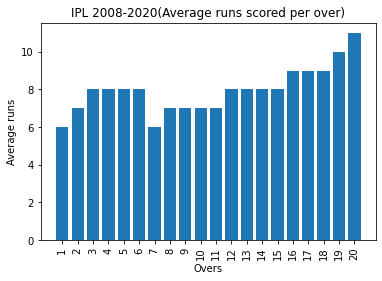

In [274]:
plt.bar(df.iloc[:,1],df.iloc[:,0],align='center')
plt.title("IPL 2008-2020(Average runs scored per over)")
plt.ylabel('Average runs')
plt.xlabel('Overs')
plt.xticks(range(1,21),rotation=90)
plt.show()

In [332]:
#average score per innings
df = np.round(deliveries[['total_runs','batting_team','inning']].groupby(['batting_team','inning']).mean()*120,0)
df = df.rename(columns={'total_runs':'average_score'})

In [343]:
#average score in first innings
df.xs(1,level=1)

,average_score
batting_team,
Chennai Super Kings,161.0
Deccan Chargers,154.0
Delhi Capitals,163.0
Delhi Daredevils,154.0
Gujarat Lions,158.0
Kings XI Punjab,159.0
Kochi Tuskers Kerala,138.0
Kolkata Knight Riders,157.0
Mumbai Indians,161.0


In [345]:
#average score in second innings
df.xs(2,level=1)

,average_score
batting_team,
Chennai Super Kings,156.0
Deccan Chargers,150.0
Delhi Capitals,154.0
Delhi Daredevils,156.0
Gujarat Lions,170.0
Kings XI Punjab,160.0
Kochi Tuskers Kerala,152.0
Kolkata Knight Riders,156.0
Mumbai Indians,155.0


In [368]:
#number of balls bowled by players
b = deliveries.bowler.value_counts().sort_index()
b

A Ashish Reddy     270
A Chandila         234
A Choudhary        108
A Dananjaya         25
A Flintoff          66
                  ... 
YA Abdulla         222
YK Pathan         1184
YS Chahal         2188
Yuvraj Singh       882
Z Khan            2276
Name: bowler, Length: 420, dtype: int64

In [409]:
#runs conceded by players
df = deliveries[['total_runs','bowler']].groupby(['bowler']).sum().sort_values('bowler')
df['balls_bowled'] = b.values
df = df.rename(columns={'total_runs':'total_runs_conceded'})

In [410]:
#economy rate of bowlers
df['Economy rate'] = np.round(((df['total_runs_conceded']*6)/df['balls_bowled']),2)
df = df[df['balls_bowled']>500] #minimum 500 balls bowled
df = df.sort_values('Economy rate')

In [411]:
#number of wickets taken by players
df['wickets'] = deliveries[['is_wicket','bowler']].groupby(['bowler']).sum().sort_values('bowler')

In [413]:
df.head(10) #top 10 economy bowlers

,total_runs_conceded,balls_bowled,Economy rate,wickets
bowler,,,,
Rashid Khan,1573,1490,6.33,80
A Kumble,1089,983,6.65,49
M Muralitharan,1755,1577,6.68,66
R Ashwin,3756,3327,6.77,153
DW Steyn,2568,2276,6.77,105
SP Narine,3208,2824,6.82,143
DL Vettori,894,785,6.83,34
Washington Sundar,758,660,6.89,26
J Botha,818,709,6.92,27


In [414]:
df.sort_values('wickets',ascending=False).head(10) #top 10 wicket takers

,total_runs_conceded,balls_bowled,Economy rate,wickets
bowler,,,,
SL Malinga,3486,2974,7.03,188
DJ Bravo,3869,2846,8.16,175
A Mishra,3913,3233,7.26,169
PP Chawla,4330,3285,7.91,164
Harbhajan Singh,4038,3451,7.02,161
R Ashwin,3756,3327,6.77,153
B Kumar,3333,2795,7.15,146
SP Narine,3208,2824,6.82,143
UT Yadav,3672,2642,8.34,137


In [438]:
#most 6's hit by a batsman
df = deliveries[deliveries['batsman_runs']==6]
df['batsman'].value_counts()

CH Gayle          349
AB de Villiers    235
MS Dhoni          216
RG Sharma         214
V Kohli           202
                 ... 
NL McCullum         1
R McLaren           1
Mohammed Siraj      1
BA Bhatt            1
LH Ferguson         1
Name: batsman, Length: 351, dtype: int64

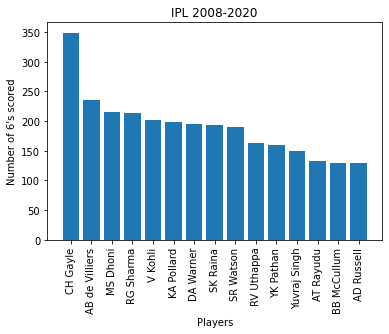

In [447]:
plt.bar(df['batsman'].value_counts().index[0:15],df['batsman'].value_counts().values[0:15])
plt.xticks(rotation=90)
plt.title('IPL 2008-2020')
plt.ylabel('Number of 6\'s scored')
plt.xlabel('Players')
plt.show()

In [444]:
#most 6's conceded by a bowler
df['bowler'].value_counts()

PP Chawla          181
A Mishra           172
RA Jadeja          148
Harbhajan Singh    142
DJ Bravo           138
                  ... 
M Manhas             1
DJ Harris            1
C Munro              1
SA Abbott            1
AA Kazi              1
Name: bowler, Length: 389, dtype: int64

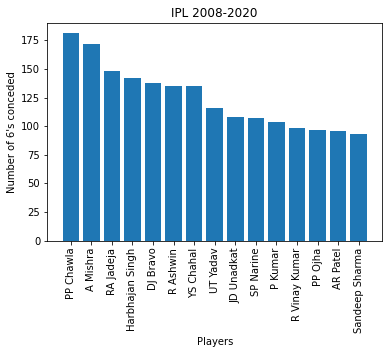

In [448]:
plt.bar(df['bowler'].value_counts().index[0:15],df['bowler'].value_counts().values[0:15])
plt.xticks(rotation=90)
plt.ylabel('Number of 6\'s conceded')
plt.title('IPL 2008-2020')
plt.xlabel('Players')
plt.show()

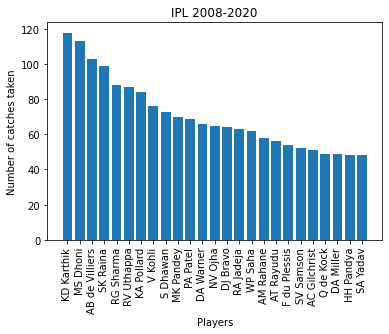

In [457]:
#most number of catches taken
df = deliveries[(deliveries['dismissal_kind']=='caught')]
df['fielder'].value_counts()
plt.bar(df['fielder'].value_counts().index[0:25],df['fielder'].value_counts().values[0:25])
plt.xticks(rotation=90)
plt.ylabel('Number of catches taken')
plt.title('IPL 2008-2020')
plt.xlabel('Players')
plt.show()

In [459]:
deliveries.head(1)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
